In [60]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### Answer 3.a - Importing the IRIS dataset

In [70]:
df = pd.read_csv('iris.csv', header=None)
df.columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Classes']

In [71]:
df1.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Classes
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
df["Target"]=0
df['Target']=np.where(df.Classes=="Iris-setosa", 0 ,np.where(df.Classes=="Iris-versicolor",1,np.where(df.Classes=="Iris-virginica",2, "NAN")))
df.head()
df.drop('Classes',axis=1,inplace=True)

In [75]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [76]:
corr=df[['SepalLength','SepalWidth','PetalLength','PetalWidth']].corr()

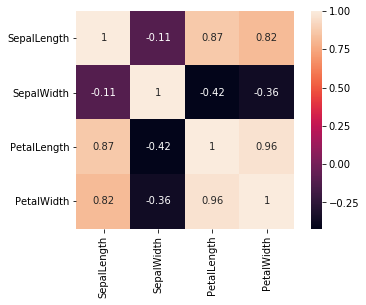

In [77]:
sns.heatmap(corr, vmax=1, square=True,annot=True)
plt.show()

In [79]:
X = df.drop(['Target'], axis=1)
y = df['Target']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=45)

### Answer 3b. - Grid Search to tune tree parameters


In [82]:
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

In [97]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
clf = GridSearchCV(dtree, 
                  {'criterion': ["gini","entropy"],
                   'max_depth':[4,5,6,7,8,10],
                    'min_samples_split':[2,3,4],
                    'max_leaf_nodes':[3,4,5,6,7,8]})
clf.fit(x_train,y_train)
print(clf.best_score_)
print(clf.best_params_)

0.966666666667
{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 3, 'min_samples_split': 2}


### 3.b - Classification

In [103]:
tree_model = tree.DecisionTreeClassifier(criterion='gini', max_depth=4,
                                        min_samples_split=2)

In [106]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [107]:
y_pred=tree_model.predict(x_test)

In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("Accuracy of Decision Tree with Grid Search:", accuracy_score(y_test,y_pred))

Accuracy of Decision Tree with Grid Search: 0.95


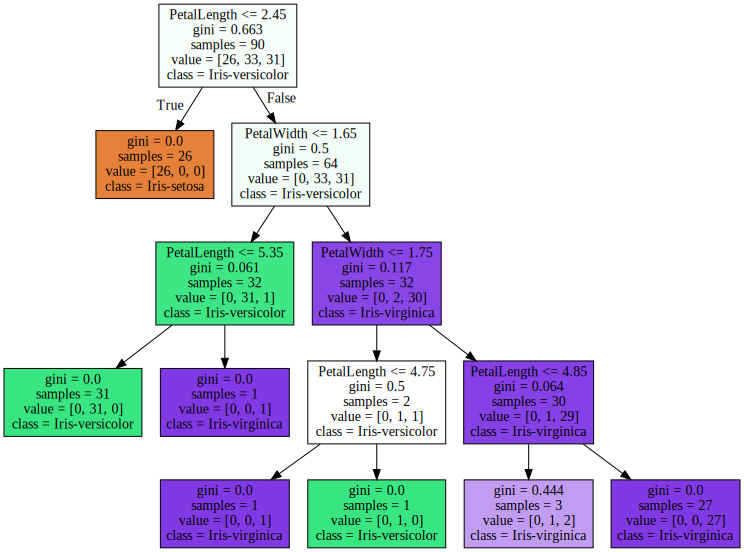

In [108]:
import graphviz

dot_data = tree.export_graphviz(tree_model, feature_names=['SepalLength','SepalWidth','PetalLength','PetalWidth'],class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'], out_file=None, filled=True)  
graph=graphviz.Source(dot_data)
graph

### 3.b CLASSIFICATION REPORT

In [109]:
print("CLASSIFICATION REPORT \n",classification_report(y_pred,y_test))

CLASSIFICATION REPORT 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        24
          1       1.00      0.89      0.94        19
          2       0.89      1.00      0.94        17

avg / total       0.97      0.97      0.97        60



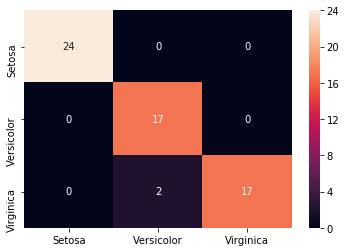

In [110]:
conf = confusion_matrix(y_test, y_pred)
label = ["Setosa","Versicolor","Virginica"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)
plt.show()

In [111]:
from sklearn.ensemble import AdaBoostClassifier

In [115]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', max_depth=6,
                                        min_samples_split=2,
                                        max_leaf_nodes=5),
                                         algorithm="SAMME",
                                         n_estimators=100,learning_rate=0.2)

In [116]:
bdt.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.2, n_estimators=100, random_state=None)

In [117]:
y_pred=bdt.predict(x_test)

In [118]:
accuracy_score(y_test,y_pred)

0.96666666666666667

In [119]:
bdt_ada = GridSearchCV(bdt,{'learning_rate':[0.1,0.2,0.3],'n_estimators':[100,200,300,400]})
bdt_ada.fit(x_train,y_train)
print(bdt_ada.best_score_)
print(bdt_ada.best_params_)

0.955555555556
{'learning_rate': 0.1, 'n_estimators': 200}


### GRIDSEARCH WITH ADABOOST CLASSIFIER

In [122]:
bdt1 =  AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', max_depth=6,
                                        min_samples_split=2,
                                        max_leaf_nodes=5),
                                        algorithm="SAMME", n_estimators=200, learning_rate=0.1)

bdt1.fit(x_train,y_train)
y_pred=bdt1.predict(x_test)
print("Accuracy of ADABOOST Classifier",accuracy_score(y_test,y_pred))

Accuracy of ADABOOST Classifier 0.966666666667


In [124]:
print("CLASSIFICATION REPORT \n",classification_report(y_pred,y_test))

CLASSIFICATION REPORT 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        24
          1       1.00      0.89      0.94        19
          2       0.89      1.00      0.94        17

avg / total       0.97      0.97      0.97        60



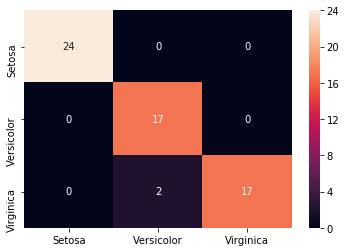

In [123]:
conf = confusion_matrix(y_test, y_pred)
label = ["Setosa","Versicolor","Virginica"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)
plt.show()